In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


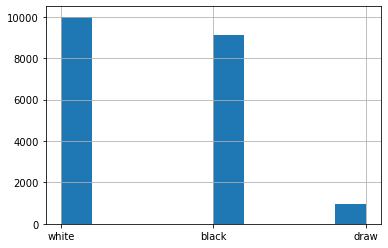

In [3]:
df['winner'].hist()

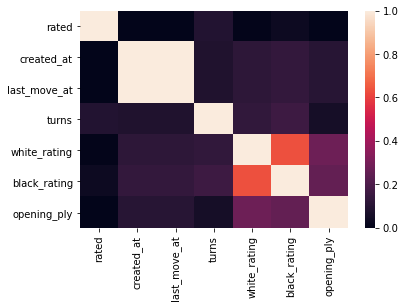

In [4]:
import seaborn as sns

sns.heatmap(df.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f922c035ee0>,
      dtype=object)

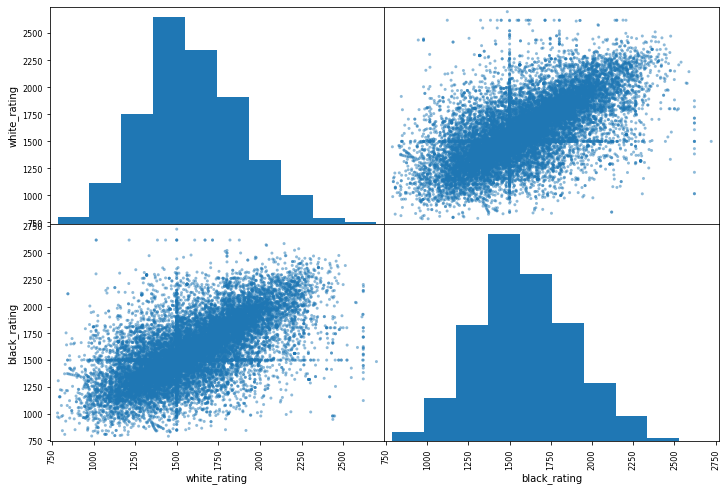

In [5]:
from pandas.plotting import scatter_matrix
attributes = ["white_rating", "black_rating", "winner"]
scatter_matrix(df[attributes], figsize=(12,8))

In [6]:
def decision(white_rating, black_rating): 
    if white_rating > black_rating:
        return 0
    else:
        return 1

In [7]:
def oneHot(category, hot):
    if category == hot:
        return 1
    else:
        return 0

labelsString = df['winner'].values.tolist()
labels = [-1] * len(labelsString)
for i in range(len(labels)):
    if labelsString[i] == 'white':
        labels[i] = 0
    elif labelsString[i] == 'black':
        labels[i] = 1
    else:
        labels[i] = 2

y = np.array(labels)


elo = []
for data, row in df.iterrows():
    pred = decision(row['white_rating'], row['black_rating'])
    elo.append(pred)
X = pd.DataFrame(elo)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred, average='macro') 
recall = recall_score(y_test, y_pred, average='macro') 
print("recall: {0}".format(recall)) 
print("precision: {0}".format(precision)) 
print("Accuracy: {0}".format(accuracy))

recall: 0.3333333333333333
precision: 0.16650049850448653
Accuracy: 0.4995014955134596


/Users/kha/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Compute ROC curve and ROC area for each class
y_test1 = label_binarize(y_test, classes=[0, 1, 2])
y_pred1 = label_binarize(y_pred, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


                                 

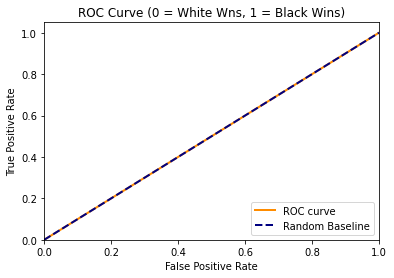

In [12]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, label = 'Random Baseline',
         linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (0 = White Wns, 1 = Black Wins)')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd

clf = Pipeline([ ("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=2.803483333,loss="hinge", max_iter= 1000))]) 
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score

accuracy = accuracy_score(y_test, predict) 
precision = precision_score(y_test, predict, average='macro') 
recall = recall_score(y_test, predict, average='macro') 
print("recall: {0}".format(recall)) 
print("precision: {0}".format(precision)) 
print("Accuracy: {0}".format(accuracy))


recall: 0.4348806058954045
precision: 0.41396423861718873
Accuracy: 0.6216350947158524


/Users/kha/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Compute ROC curve and ROC area for each class
y_test2 = label_binarize(y_test, classes=[0, 1, 2])
predict = label_binarize(predict, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test2.ravel(), predict.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

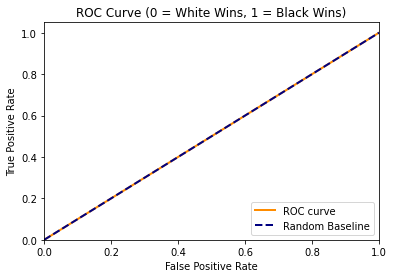

In [16]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, label='Random Baseline',
         linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (0 = White Wins, 1 = Black Wins)')
plt.legend(loc="lower right")
plt.show()